In [53]:
import pandas as pd

In [54]:
# Load the dataset
filep = '../AA_DS/datasett.csv'
data = pd.read_csv(filep)

# Display the first few rows of the dataset
data.head()

,Age,Gender,Location,Income,Non-ess product,Preferred Shopping,Factors,Familiarity,Aspects,Buying,Purchased in 6 months,Prevention,Switch to sustainability,Awareness,Recommendation,Comments
0,65,Male,Mumbai,50000,Daily,Physical retail store,Price,Somewhat familiar,Environmental Friendly Materials,Always,Eco friendly clothing,No significant difference from non-sustainable...,Yes,Certifications,Very likely,brand promotion
1,25,Male,Mumbai,50000,Few times a year,Physical retail store,Price,Very familiar,Environmental Friendly Materials,Often,Energy efficieant electronics,Higher Cost,Yes,Certifications,Somewhat likely,brand promotion
2,25,Male,Mumbai,50000,Daily,"Online marketplaces (e.g., Amazon)",Brand Reputation,Very familiar,Environmental Friendly Materials,Rarely,Biodegradable or recyclable packaging,Limited Availability,Yes,Clear sustainability labeling on products,Very likely,No comments
3,25,Male,Mumbai,25000,Monthly,Brand specific online store,Brand Reputation,Somewhat familiar,Minimal Packaging,Sometimes,Biodegradable or recyclable packaging,Lack of Information,Yes,Clear sustainability labeling on products,Very likely,No comments
4,35,Male,Mumbai,50000,Monthly,"Online marketplaces (e.g., Amazon)",Brand Reputation,Somewhat familiar,Environmental Friendly Materials,Always,Eco friendly clothing,Lack of Information,Yes,Comparison of sustainable vs. non-sustainable ...,Neutral,-


In [55]:
# 1. Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                         0
Gender                      0
Location                    0
Income                      0
Non-ess product             0
Preferred Shopping          0
Factors                     0
Familiarity                 0
Aspects                     0
Buying                      0
Purchased in 6 months       0
Prevention                  0
Switch to sustainability    0
Awareness                   0
Recommendation              0
Comments                    0
dtype: int64


In [56]:
# Drop rows with missing values
data = data.dropna()

# Or drop columns with missing values
data = data.dropna(axis=1)

In [57]:
# Standardize Categorical Variables
data['Gender'] = data['Gender'].str.lower()
data['Location '] = data['Location '].str.lower()

In [58]:
print(data['Gender'].unique())
print(data['Location '].unique())

['male' 'female']
['mumbai' 'chennai' 'delhi' 'hyderabad' 'ahmedabad' 'pune']


In [59]:
# Remove duplicates
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Remove duplicates
data = data.drop_duplicates()

Duplicates: 1516


In [60]:
#Column which is not in use
data = data.drop('Comments', axis=1)

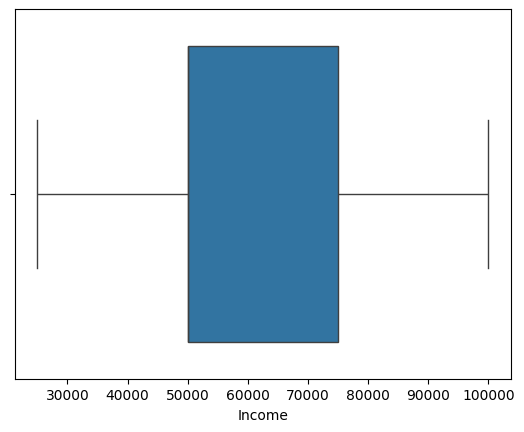

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting to detect outliers
sns.boxplot(x=data['Income'])
plt.show()

# Remove outliers (example threshold)
data = data[data['Income'] < 100000]

In [62]:
data.to_csv('cleaned_dataset.csv', index=False)

In [63]:
data1 = pd.read_csv('cleaned_dataset.csv')
data1.head()

,Age,Gender,Location,Income,Non-ess product,Preferred Shopping,Factors,Familiarity,Aspects,Buying,Purchased in 6 months,Prevention,Switch to sustainability,Awareness,Recommendation
0,65,male,mumbai,50000,Daily,Physical retail store,Price,Somewhat familiar,Environmental Friendly Materials,Always,Eco friendly clothing,No significant difference from non-sustainable...,Yes,Certifications,Very likely
1,25,male,mumbai,50000,Few times a year,Physical retail store,Price,Very familiar,Environmental Friendly Materials,Often,Energy efficieant electronics,Higher Cost,Yes,Certifications,Somewhat likely
2,25,male,mumbai,50000,Daily,"Online marketplaces (e.g., Amazon)",Brand Reputation,Very familiar,Environmental Friendly Materials,Rarely,Biodegradable or recyclable packaging,Limited Availability,Yes,Clear sustainability labeling on products,Very likely
3,25,male,mumbai,25000,Monthly,Brand specific online store,Brand Reputation,Somewhat familiar,Minimal Packaging,Sometimes,Biodegradable or recyclable packaging,Lack of Information,Yes,Clear sustainability labeling on products,Very likely
4,35,male,mumbai,50000,Monthly,"Online marketplaces (e.g., Amazon)",Brand Reputation,Somewhat familiar,Environmental Friendly Materials,Always,Eco friendly clothing,Lack of Information,Yes,Comparison of sustainable vs. non-sustainable ...,Neutral


In [64]:
# EDA
# Display basic information about the dataset
print(data1.info())

# Show descriptive statistics
print(data1.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       975 non-null    int64 
 1   Gender                    975 non-null    object
 2   Location                  975 non-null    object
 3   Income                    975 non-null    int64 
 4   Non-ess product           975 non-null    object
 5   Preferred Shopping        975 non-null    object
 6   Factors                   975 non-null    object
 7   Familiarity               975 non-null    object
 8   Aspects                   975 non-null    object
 9   Buying                    975 non-null    object
 10  Purchased in 6 months     975 non-null    object
 11  Prevention                975 non-null    object
 12  Switch to sustainability  975 non-null    object
 13  Awareness                 975 non-null    object
 14  Recommendation            

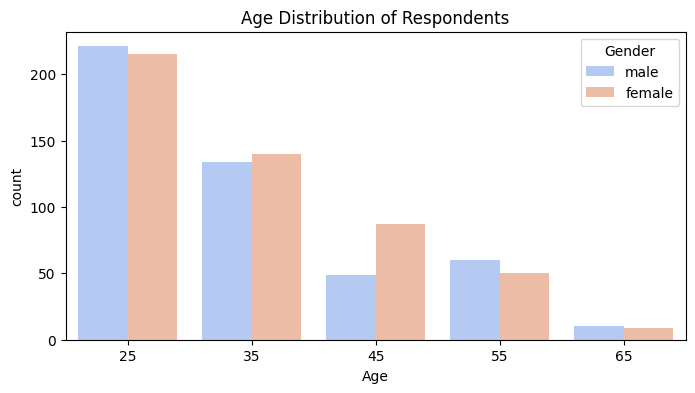

In [65]:
# Demographics
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Age', hue='Gender', palette='coolwarm')
plt.title('Age Distribution of Respondents')
plt.show()

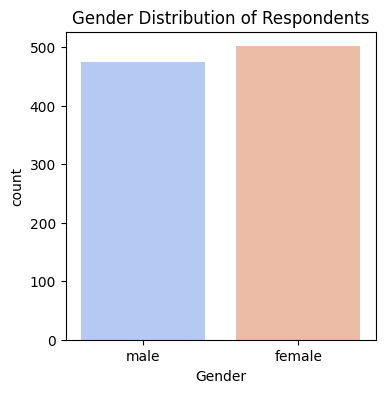

In [66]:
plt.figure(figsize=(4, 4))
sns.countplot(data=data, x='Gender', hue='Gender', palette='coolwarm', legend=False)
plt.title('Gender Distribution of Respondents')
plt.show()

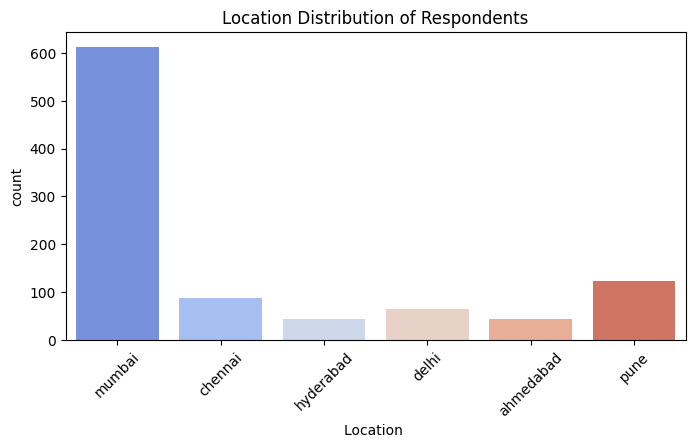

In [67]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Location ', hue='Location ', palette='coolwarm', legend=False)
plt.title('Location Distribution of Respondents')
plt.xticks(rotation=45)
plt.show()

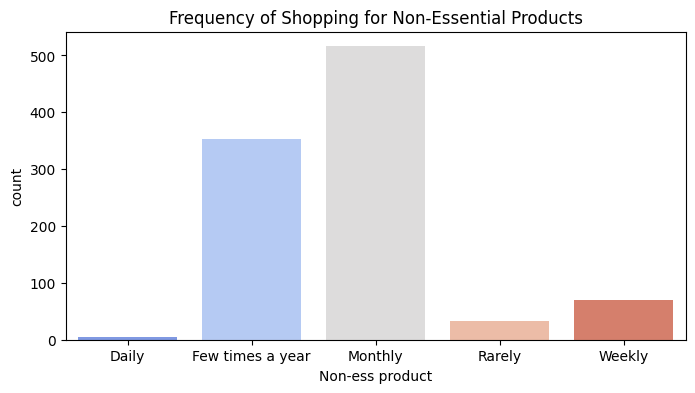

In [68]:
# Analysing shopping behavior

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Non-ess product', hue='Non-ess product', palette='coolwarm', legend=False)
plt.title('Frequency of Shopping for Non-Essential Products')
plt.show()

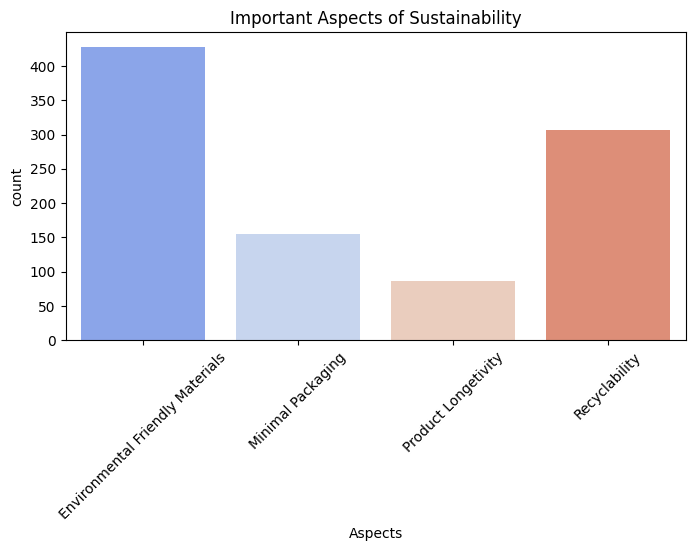

In [69]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Aspects', hue='Aspects', palette='coolwarm', legend=False)
plt.title('Important Aspects of Sustainability')
plt.xticks(rotation=45)
plt.show()

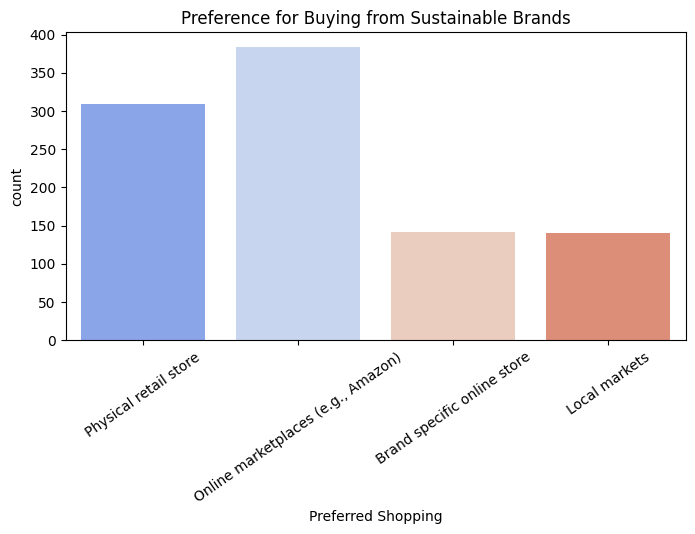

In [70]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Preferred Shopping', hue='Preferred Shopping', palette='coolwarm', legend=False)
plt.title('Preference for Buying from Sustainable Brands')
plt.xticks(rotation=35)
plt.show()

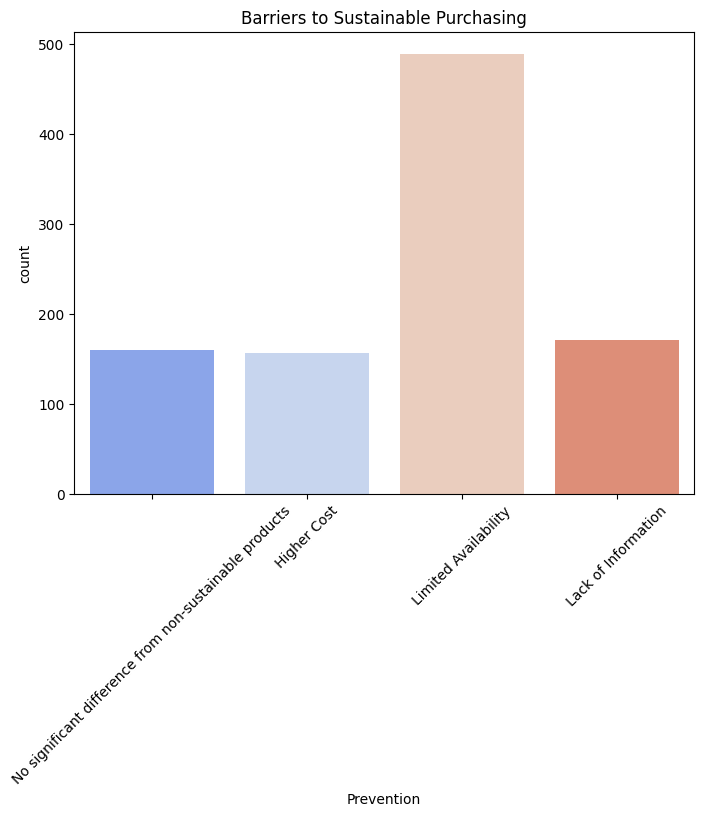

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Prevention', hue='Prevention', palette='coolwarm', legend=False)
plt.title('Barriers to Sustainable Purchasing')
plt.xticks(rotation=45)
plt.show()

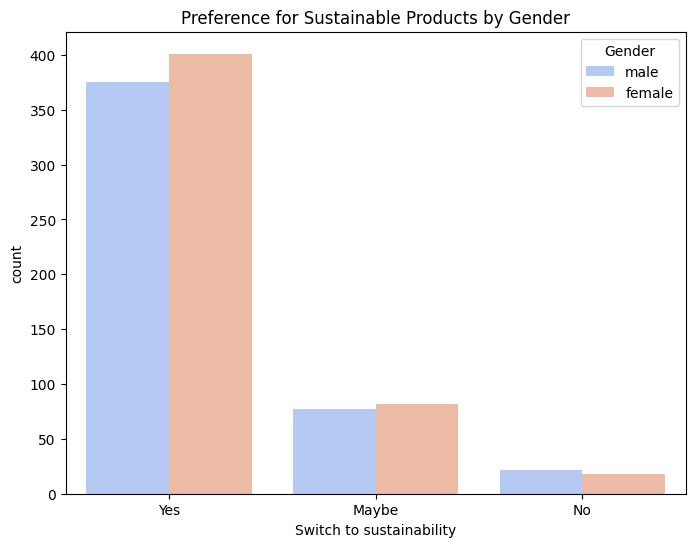

In [72]:
# preference by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Switch to sustainability', hue='Gender', palette='coolwarm')
plt.title('Preference for Sustainable Products by Gender')
plt.show()


In [73]:
# Hypothesis testing
from scipy.stats import chi2_contingency

#Gender vs. Switching to sustainability
contingency_table = pd.crosstab(data['Gender'], data['Switch to sustainability'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"P-value for Gender vs. Switching to sustainability: {p}")

P-value for Gender vs. Switching to sustainability: 0.7113445258985724


In [74]:
#Testing With various Machine learning models

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

df = pd.read_csv('../AA_DS/datasett.csv')

# Converting categorical variables into dummy/indicator variables
data_encoded = pd.get_dummies(df, drop_first=True)

# feature, target
X = data_encoded.drop('Switch to sustainability_Yes', axis=1)
y = data_encoded['Switch to sustainability_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scaling the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)



In [75]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver='lbfgs'),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    print(f"-+--------------------- {name} ---------------------+-")
    print()
    
    model.fit(X_train_smote, y_train_smote)

    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


-+--------------------- Logistic Regression ---------------------+-

Accuracy: 0.752
Confusion Matrix:
 [[ 55  86]
 [100 509]]
Classification Report:
               precision    recall  f1-score   support

       False       0.35      0.39      0.37       141
        True       0.86      0.84      0.85       609

    accuracy                           0.75       750
   macro avg       0.61      0.61      0.61       750
weighted avg       0.76      0.75      0.76       750



-+--------------------- Support Vector Machine ---------------------+-

Accuracy: 0.9026666666666666
Confusion Matrix:
 [[ 87  54]
 [ 19 590]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.62      0.70       141
        True       0.92      0.97      0.94       609

    accuracy                           0.90       750
   macro avg       0.87      0.79      0.82       750
weighted avg       0.90      0.90      0.90       750



-+--------------------- 